In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("~/downloads/leba.csv")

# Rename columns
oldcols = [
    "slypos_leba_16", "slypos_leba_17", "slypos_leba_38", "slypos_leba_08", "slypos_leba_09", "slypos_leba_10",
    "slypos_leba_11", "slypos_leba_12", "slypos_leba_07", "slypos_leba_27", "slypos_leba_03", "slypos_leba_42",
    "slypos_leba_30", "slypos_leba_43", "slypos_leba_32", "slypos_leba_37", "slypos_leba_40", "slypos_leba_33",
    "slypos_leba_48", "slypos_leba_47", "slypos_leba_25", "slypos_leba_04", "slypos_leba_01"
]
newcols = [
    "S01", "S02", "S03", "S04", "S05", "S06", "S07", "S08", "S09", "S10", "S11", "S12",
    "S13", "S14", "S15", "S16", "S17", "S18", "S19", "S20", "S21", "S22", "S23"
]
data.rename(columns=dict(zip(oldcols, newcols)), inplace=True)

# Create new factor columns
data["F1"] = data[["S01", "S02", "S03"]].sum(axis=1)
data["F2"] = data[["S04", "S05", "S06", "S07", "S08", "S09"]].sum(axis=1)
data["F3"] = data[["S10", "S11", "S12", "S13", "S14"]].sum(axis=1)
data["F4"] = data[["S15", "S16", "S17", "S18"]].sum(axis=1)
data["F5"] = data[["S19", "S20", "S21", "S22", "S23"]].sum(axis=1)

# Prepare graph data
graph_data = data[[
    "slypos_demographics_age", "F2", "F3", "F5"
]].copy()
graph_data.rename(columns={
    "F2": "Spending time outdoors",
    "F3": "Using phone and smartwatch in bed",
    "F5": "Using light in the morning and during daytime",
    "slypos_demographics_age": "age"
}, inplace=True)

# Melt data for plotting
graph_data_melted = graph_data.melt(id_vars="age", var_name="variable", value_name="value")

graph_data_melted

,age,variable,value
0,25,Spending time outdoors,17
1,20,Spending time outdoors,18
2,22,Spending time outdoors,15
3,25,Spending time outdoors,18
4,24,Spending time outdoors,11
...,...,...,...
2065,26,Using light in the morning and during daytime,10
2066,35,Using light in the morning and during daytime,6
2067,25,Using light in the morning and during daytime,8
2068,38,Using light in the morning and during daytime,11


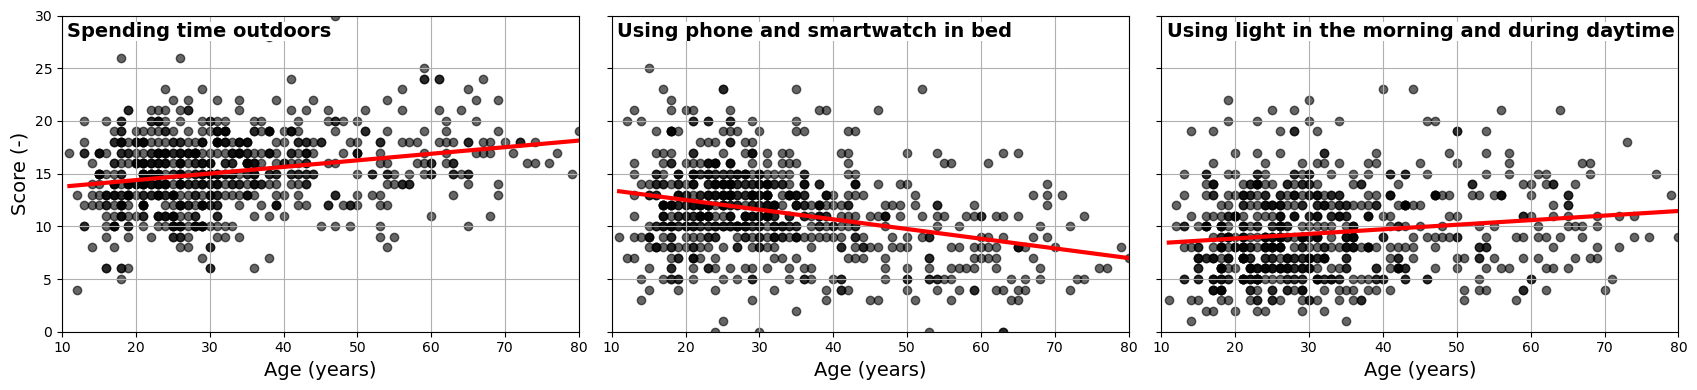

In [61]:
from sklearn.linear_model import LinearRegression

variables = graph_data_melted['variable'].unique()
fig, axes = plt.subplots(1, len(variables), figsize=(6 * len(variables), 4), sharey=True)

for i, (ax, var) in enumerate(zip(axes, variables)):
    subset = graph_data_melted[graph_data_melted['variable'] == var]
    # Jitter age values for better visualization
    # jittered_age = subset['age'] + np.random.normal(0, 0.5, size=len(subset))
    ax.scatter(subset['age'], subset['value'], alpha=0.6, color='black')
    
    # Fit and plot linear regression
    X = subset['age'].values.reshape(-1, 1)
    y = subset['value'].values
    model = LinearRegression().fit(X, y)
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    ax.plot(x_range, y_pred, color='red', linewidth=3)
    ax.set_xlim(10,80)
    ax.set_ylim(0,30)
    # ax.set_title(var)
    ax.set_xlabel("Age (years)", fontsize=14)
    if i == 0:
        ax.set_ylabel("Score (-)", fontsize=14)
    else:
        ax.set_ylabel("")
    ax.grid(True)

    ax.text(
        0.01, 0.98, var,
        transform=ax.transAxes,
        fontsize=14,
        fontweight='bold',
        va='top',
        ha='left',
        bbox=dict(facecolor='white', alpha=1, edgecolor='none', pad=0.2)
    )
plt.tight_layout()
plt.show()

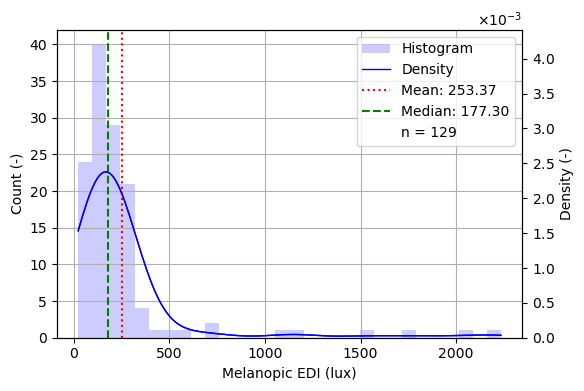

In [50]:
# histogram/density curve of mEDI_[lux]
# median or mean vertical lines
# indicate the number of data points on the plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

data = pd.read_excel("~/downloads/classroom.xlsx", sheet_name="Main")
x = data["mEDI_[lux]"].dropna()

mean = x.mean()
median = x.median()

plt.figure(figsize=(6, 4))

ax = plt.gca()
ax2 = ax.twinx()

counts, bins, _ = ax.hist(x, bins=30, alpha=0.2, color='blue', label='Histogram')

density = gaussian_kde(x)
x_vals = np.linspace(x.min(), x.max(), 200)
bin_width = bins[1] - bins[0]
scaled_density = density(x_vals) * len(x) * bin_width

ax.plot(x_vals, scaled_density, color='blue', label='Density', linewidth=1)

ax2.plot(x_vals, density(x_vals), color='blue', label='Non-Scaled Density', linewidth=1)

ymin, ymax = ax.get_ylim()
density_min = 0
density_max = ymax / (len(x) * bin_width)
ax2.set_ylim(density_min, density_max)

ax.axvline(mean, color='red', linestyle=':', label=f'Mean: {mean:.2f}')
ax.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')

from matplotlib.lines import Line2D
handles, labels = ax.get_legend_handles_labels()
handles.append(Line2D([0], [0], color='none', label=f'n = {len(x)}'))
ax.legend(handles, labels + [f'n = {len(x)}'])

ax.set_xlabel('Melanopic EDI (lux)')
ax.set_ylabel('Count (-)')

from matplotlib.ticker import ScalarFormatter

ax2.set_ylabel('Density (-)')
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.grid()
plt.show()